In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# Lire le fichier CSV
file_path = 'Cars.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# Afficher les premières lignes du DataFrame pour vérification
print(data.head())

       Marque      Modéle  Année-Modéle        Kilométrage Carburant  \
0        Fiat       Punto          2007  200 000 - 249 999    Diesel   
1       Dacia  Dokker Van          2013  400 000 - 449 999    Diesel   
2       Dacia      Dokker          2014  160 000 - 169 999    Diesel   
3  Volkswagen     Touareg          2005          0 - 4 999    Diesel   
4      Toyota       Prado          2007  200 000 - 249 999    Diesel   

   Puissance fiscale          bdv main       Etat   Prix  
0                  5     Manuelle  Non   Trés bon  60000  
1                  6     Manuelle  Non  Excellent  70000  
2                  6     Manuelle  NaN   Trés bon  90000  
3                 10  Automatique  Oui  Excellent  90000  
4                 12     Manuelle  Non  Excellent  97000  


In [25]:
# Définir une fonction pour extraire la valeur moyenne du kilométrage
def extract_mean_kilometrage(kilometrage):
    if isinstance(kilometrage, str):
        # Diviser la chaîne pour obtenir les valeurs min et max, puis calculer la moyenne
        min_value, max_value = map(int, kilometrage.replace(' ', '').split('-'))
        # Retourner la moyenne
        return (min_value + max_value) / 2
    else:
        return kilometrage

# Appliquer la fonction à la colonne "Kilométrage"
data['Kilométrage'] = data['Kilométrage'].apply(extract_mean_kilometrage)


In [26]:
print(data.head())

       Marque      Modéle  Année-Modéle  Kilométrage Carburant  \
0        Fiat       Punto          2007     224999.5    Diesel   
1       Dacia  Dokker Van          2013     424999.5    Diesel   
2       Dacia      Dokker          2014     164999.5    Diesel   
3  Volkswagen     Touareg          2005       2499.5    Diesel   
4      Toyota       Prado          2007     224999.5    Diesel   

   Puissance fiscale          bdv main       Etat   Prix  
0                  5     Manuelle  Non   Trés bon  60000  
1                  6     Manuelle  Non  Excellent  70000  
2                  6     Manuelle  NaN   Trés bon  90000  
3                 10  Automatique  Oui  Excellent  90000  
4                 12     Manuelle  Non  Excellent  97000  


In [27]:
# Trouver le nombre total de valeurs NaN dans chaque colonne
nan_counts = data.isna().sum()

# Afficher le nombre total de valeurs NaN par colonne
print(nan_counts)


Marque                  0
Modéle                  0
Année-Modéle            0
Kilométrage             0
Carburant               0
Puissance fiscale       0
bdv                     0
main                 6209
Etat                 6678
Prix                    0
dtype: int64


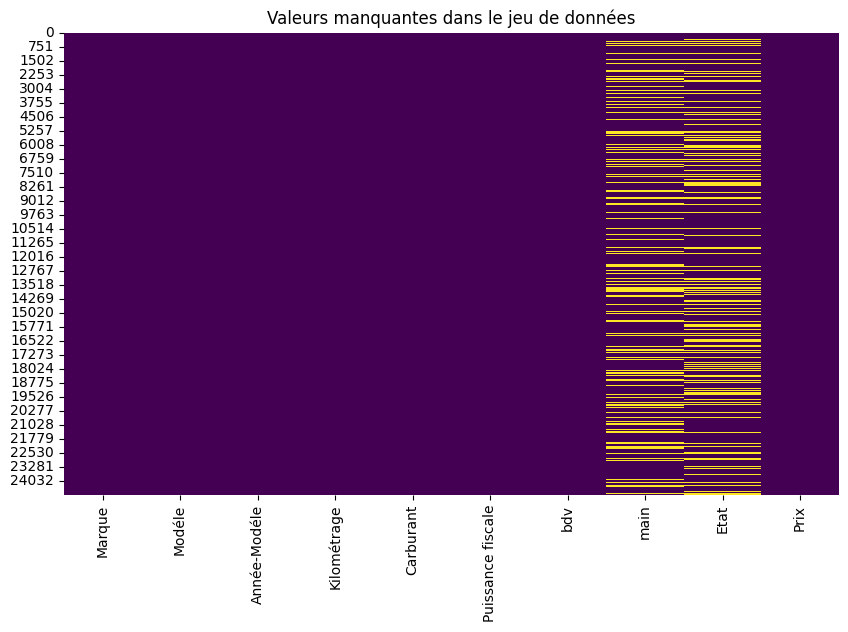

In [28]:
# Heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes dans le jeu de données')
plt.show()

In [29]:
# Statistiques descriptives
desc_stats = data.describe()
print(desc_stats)

       Année-Modéle    Kilométrage  Puissance fiscale          Prix
count  24776.000000   24776.000000       24776.000000  2.477600e+04
mean    2011.844244  133035.199871           7.193938  2.169588e+05
std        5.462925   89088.887159           1.574124  6.749569e+06
min     1990.000000    2499.500000           5.000000  6.000000e+04
25%     2008.000000   62499.500000           6.000000  7.500000e+04
50%     2013.000000  124999.500000           7.000000  1.000000e+05
75%     2016.000000  194999.500000           8.000000  1.400000e+05
max     2022.000000  474999.500000          14.000000  6.120372e+08


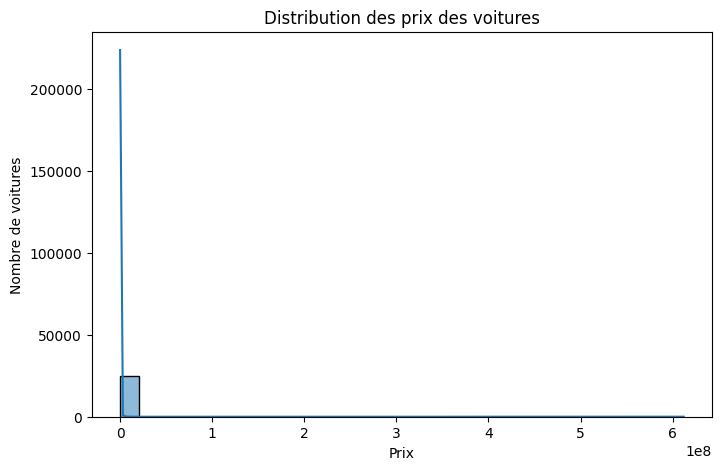

In [30]:
# Histogramme pour visualiser la distribution de la variable cible 'Prix'
plt.figure(figsize=(8, 5))
sns.histplot(data['Prix'], bins=30, kde=True)
plt.xlabel('Prix')
plt.ylabel('Nombre de voitures')
plt.title('Distribution des prix des voitures')
plt.show()


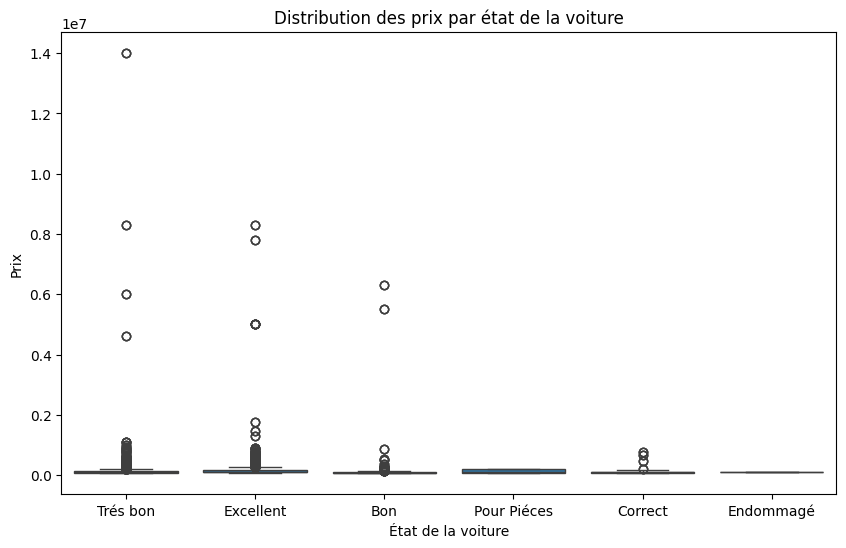

In [31]:
# Boxplot de la distribution des prix par état de la voiture
plt.figure(figsize=(10, 6))
sns.boxplot(x='Etat', y='Prix', data=data)
plt.xlabel('État de la voiture')
plt.ylabel('Prix')
plt.title('Distribution des prix par état de la voiture')
plt.show()

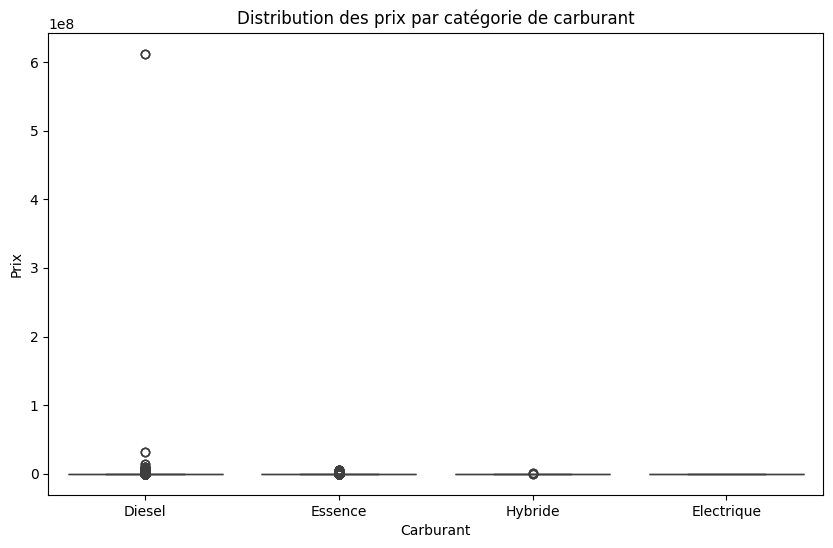

In [32]:
# Boxplot de la distribution des prix par catégorie de carburant
plt.figure(figsize=(10, 6))
sns.boxplot(x='Carburant', y='Prix', data=data)
plt.xlabel('Carburant')
plt.ylabel('Prix')
plt.title('Distribution des prix par catégorie de carburant')
plt.show()

In [34]:
# Conversion des champs non numériques en valeurs numériques
data['Carburant'] = data['Carburant'].map({'Diesel': 1, 'Essence': 0})
data['bdv'] = data['bdv'].map({'Manuelle': 1, 'Automatique': 0})
data['main'] = data['main'].map({'Non': 1, 'Oui': 0})
# Créer un dictionnaire de correspondance entre les états et les valeurs numériques
etat_mapping = {'Trés bon': 2, 'Excellent': 3, 'Bon': 1, 'Pour Pièces': 4, 'Correct': 5, 'Endommagé': 6}
# Remplacer les valeurs de la colonne 'Etat' en utilisant le dictionnaire de correspondance
data['Etat'] = data['Etat'].map(etat_mapping)



In [35]:
# Initialiser LabelEncoder
label_encoder = LabelEncoder()

# Appliquer LabelEncoder aux colonnes "Marque" et "Modèle"
data['Marque'] = label_encoder.fit_transform(data['Marque'])
data['Modéle'] = label_encoder.fit_transform(data['Modéle'])

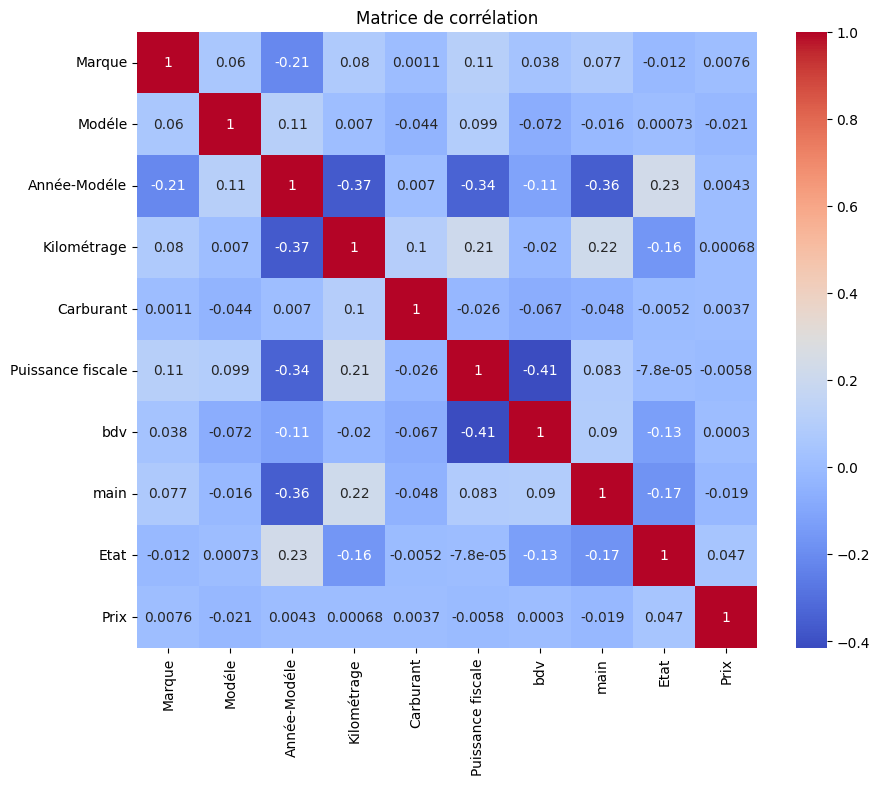

In [36]:
# Matrice de corrélation
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


In [37]:
# Corrélation avec la variable cible 'Prix'
corr_with_price = correlation_matrix['Prix'].sort_values(ascending=False)
print("Corrélations avec le prix :\n", corr_with_price)

Corrélations avec le prix :
 Prix                 1.000000
Etat                 0.046648
Marque               0.007634
Année-Modéle         0.004347
Carburant            0.003739
Kilométrage          0.000682
bdv                  0.000298
Puissance fiscale   -0.005784
main                -0.019443
Modéle              -0.021065
Name: Prix, dtype: float64


In [38]:
# Création des données d'entraînement et de test
X = data.drop(columns=['Prix'])  # Sélectionner toutes les colonnes sauf 'Prix'
y = data['Prix']

# Remplacer les valeurs NaN par la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluation des performances du modèle
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 570438280343.6088


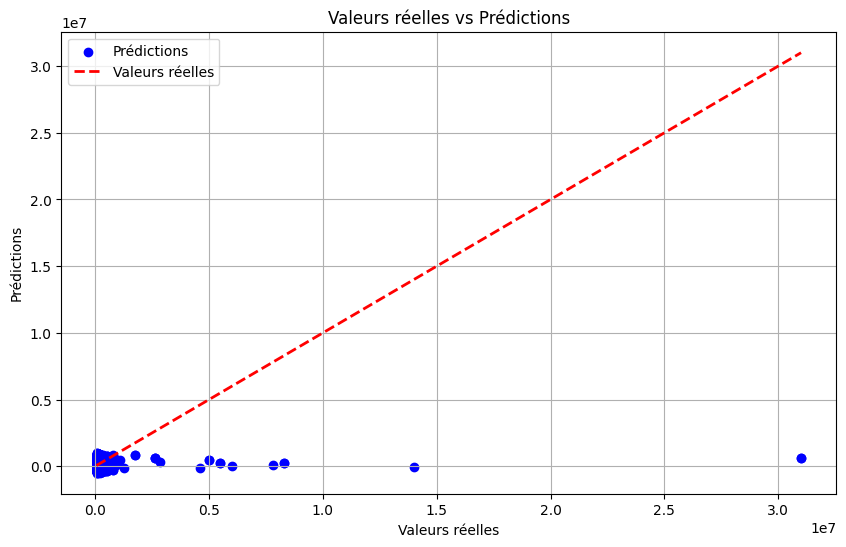

In [39]:
# Tracer les valeurs réelles par rapport aux prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs réelles vs Prédictions')
plt.legend()
plt.grid(True)
plt.show()
